In [12]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\bigcare\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')

### 주가 시각화 basic

In [14]:
import FinanceDataReader as fdr

# 종목 코드
# Samsung - 005930
# Apple - AAPL
# Ford - F
# Amazon - AMZN

df_samsung = fdr.DataReader('005930')
df_apple = fdr.DataReader('AAPL', '2021')

In [15]:
print('------------------ samsung ------------------\n', df_samsung, '\n')
print('------------------ apple ------------------\n', df_apple)

------------------ samsung ------------------
              Open   High    Low  Close    Volume    Change
Date                                                      
1998-04-29   1245   1312   1219   1294    238910       NaN
1998-04-30   1312   1387   1301   1378    616240  0.064915
1998-05-02   1340   1359   1284   1285    236600 -0.067489
1998-05-04   1266   1275   1230   1240    274250 -0.035019
1998-05-06   1219   1239   1204   1210    312220 -0.024194
...           ...    ...    ...    ...       ...       ...
2022-06-28  59200  59500  58700  59400  13540538  0.010204
2022-06-29  58500  58800  58000  58000  14677138 -0.023569
2022-06-30  57200  57600  57000  57000  18915142 -0.017241
2022-07-01  56900  57500  55900  56200  24982097 -0.014035
2022-07-04  56100  57400  55700  56800  14450861  0.010676

[6000 rows x 6 columns] 

------------------ apple ------------------
              Close    Open    High     Low       Volume  Change
Date                                              

#### 칼럼 설명
- Open: 시가
- Close: 종가
- High: 고가
- Low: 저가
- Volume: 거래량
- Change: 대비

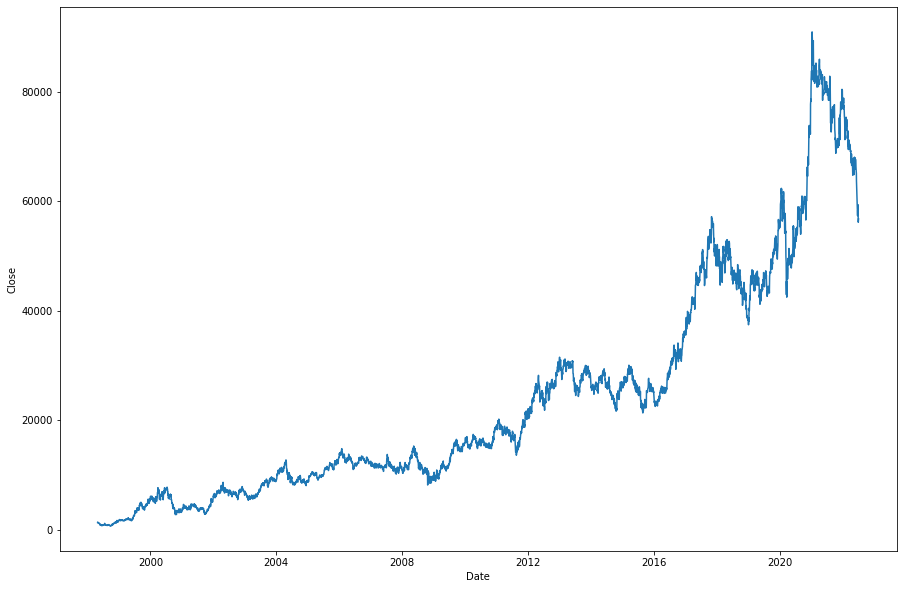

In [16]:
# 삼성 주가 시각화

plt.figure(figsize=(15, 10))
sns.lineplot(x=df_samsung.index, y='Close', data=df_samsung)
plt.show()

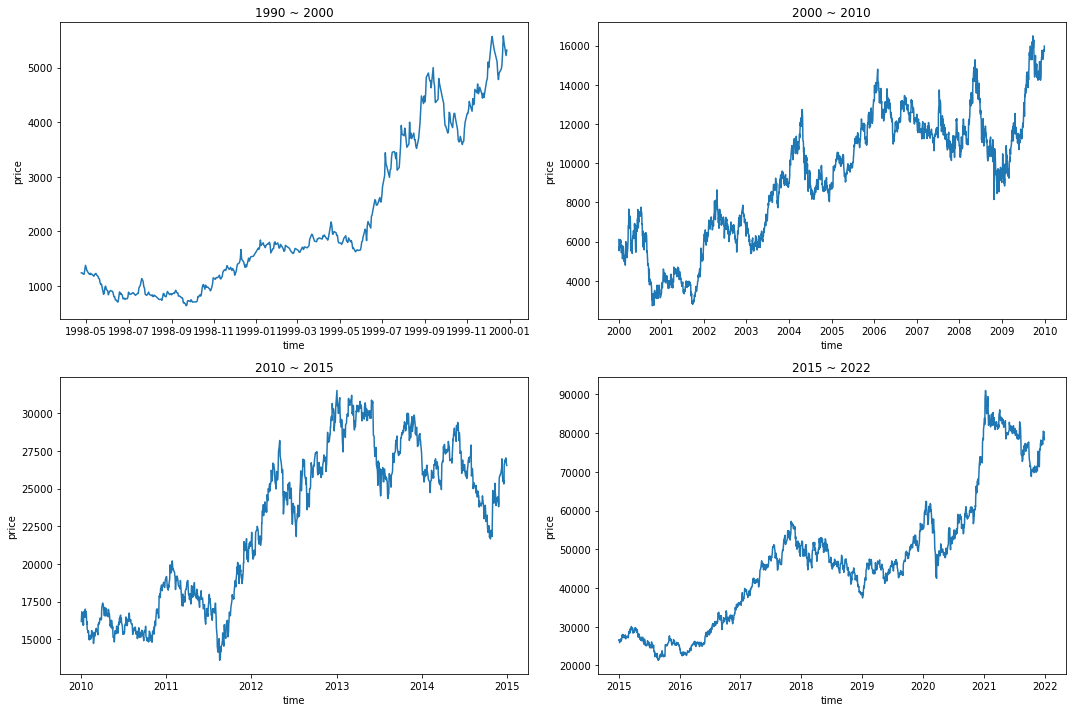

In [5]:
time_steps = [['1990', '2000'],
              ['2000', '2010'],
              ['2010', '2015'],
              ['2015', '2022']]

fig, axes = plt.subplots(2,2)
fig.set_size_inches(15, 10)

for i in range(4):
    ax = axes[i//2, i%2]
    df = df_samsung.loc[(df_samsung.index > time_steps[i][0]) & (df_samsung.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]} ~ {time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')

plt.tight_layout()
plt.show()

### Prophet

In [11]:
# import modules

from fbprophet import Prophet
# plotly: 인터랙티브 시각화
from fbprophet.plot import plot_plotly, plot_components_plotly

ModuleNotFoundError: No module named 'fbprophet'

columns
* y column, ds column are must be included -- 이름도 y, ds로 동일해야 함 (prophet 사용할 때)
    - y: 예측값
    - ds: 시계열 데이터

In [7]:
stock = fdr.DataReader('005930', '2021')
stock['y'] = stock['Close']
stock['ds'] = stock.index

In [8]:
stock

,Open,High,Low,Close,Volume,Change,y,ds
Date,,,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691,83000,2021-01-04
2021-01-05,81600,83900,81600,83900,35335669,0.010843,83900,2021-01-05
2021-01-06,83300,84500,82100,82200,42089013,-0.020262,82200,2021-01-06
2021-01-07,82800,84200,82700,82900,32644642,0.008516,82900,2021-01-07
2021-01-08,83300,90000,83000,88800,59013307,0.071170,88800,2021-01-08
...,...,...,...,...,...,...,...,...
2022-06-22,59000,59100,57600,57600,23334687,-0.015385,57600,2022-06-22
2022-06-23,57700,58000,56800,57400,28338608,-0.003472,57400,2022-06-23
2022-06-24,57900,59100,57700,58400,23256103,0.017422,58400,2022-06-24


In [9]:
# prophet 객체 선언 및 학습

p = Prophet()
p.fit(stock)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
# periods: 예측하고 싶은 구간
# 즉, 지금까지의 데이터를 가지고 향후 30일간의 데이터 예측
future = p.make_future_dataframe(periods=30)
future.head()

,ds
0,2021-01-04
1,2021-01-05
2,2021-01-06
3,2021-01-07
4,2021-01-08


중요하게 봐야할 칼럼: yhat
- yhat: 예측값
    - 즉, predicted stock price
    - e.g) yhat = b + wx

In [11]:
forecast = p.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-04,85746.506935,84145.558093,88635.983157,85746.506935,85746.506935,649.838518,649.838518,649.838518,649.838518,649.838518,649.838518,0.0,0.0,0.0,86396.345453
1,2021-01-05,85693.452558,84266.143108,88664.257739,85693.452558,85693.452558,736.057172,736.057172,736.057172,736.057172,736.057172,736.057172,0.0,0.0,0.0,86429.509730
2,2021-01-06,85640.398180,83890.082531,88461.163426,85640.398180,85640.398180,557.833667,557.833667,557.833667,557.833667,557.833667,557.833667,0.0,0.0,0.0,86198.231848
3,2021-01-07,85587.343803,83919.533265,88283.661051,85587.343803,85587.343803,523.306062,523.306062,523.306062,523.306062,523.306062,523.306062,0.0,0.0,0.0,86110.649865
4,2021-01-08,85534.289426,83783.233390,88312.656727,85534.289426,85534.289426,508.554298,508.554298,508.554298,508.554298,508.554298,508.554298,0.0,0.0,0.0,86042.843724


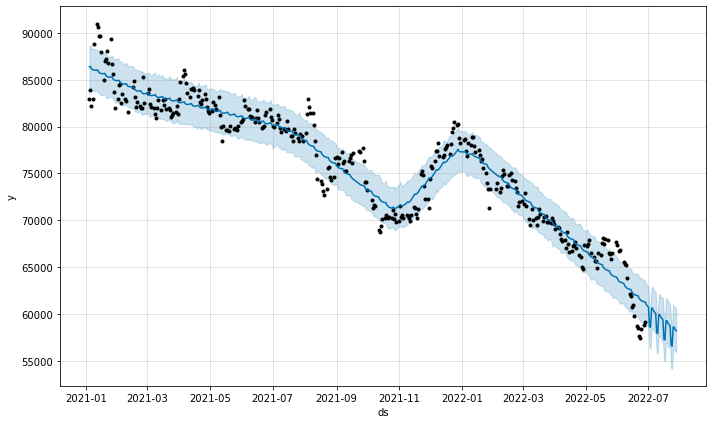

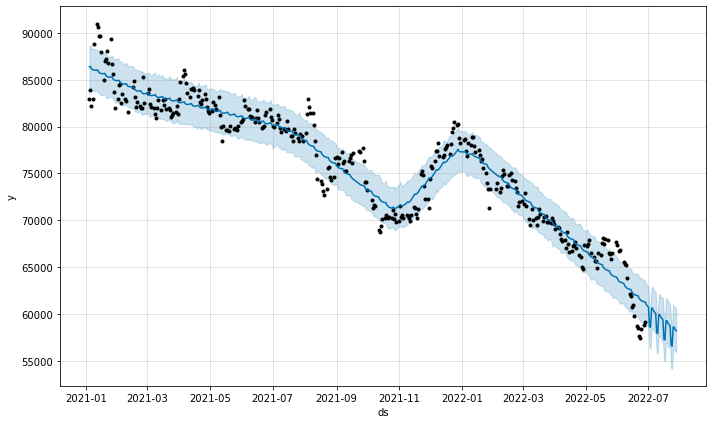

In [12]:
p.plot(forecast)

In [13]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-40:-20]

,ds,yhat,yhat_lower,yhat_upper
357,2022-06-15,62327.117896,60297.019722,64499.054017
358,2022-06-16,62197.098200,60089.028596,64314.160558
359,2022-06-17,62086.854345,59767.919623,64351.988918
360,2022-06-20,61941.662292,59723.816141,64237.875614
361,2022-06-21,61932.388855,59750.581150,64263.366675
362,2022-06-22,61658.673259,59389.984677,63841.934948
363,2022-06-23,61528.653563,59238.714041,63920.546470
364,2022-06-24,61418.409709,59155.936750,63760.090337
365,2022-06-27,61273.217655,59054.504222,63625.929606
366,2022-06-28,61263.944218,59000.087219,63387.755328


#### 시각화

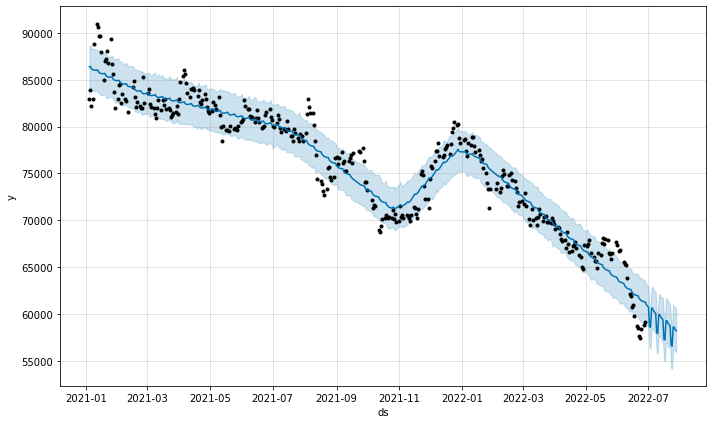

In [14]:
fig = p.plot(forecast)

In [15]:
fig = plot_plotly(p, forecast)
fig

In [16]:
# 컴포넌트별 시각회
# 주별, 월별, 연도별 시각화

plot_components_plotly(p, forecast)

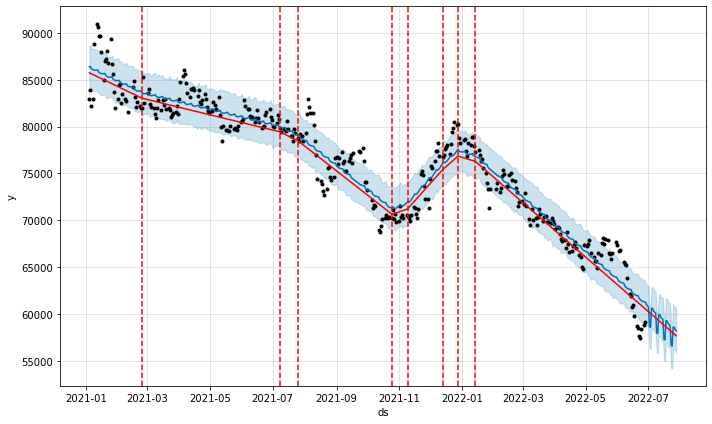

In [17]:
from fbprophet.plot import add_changepoints_to_plot

fig = p.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), p, forecast)
# change point의미 알아보기!!

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


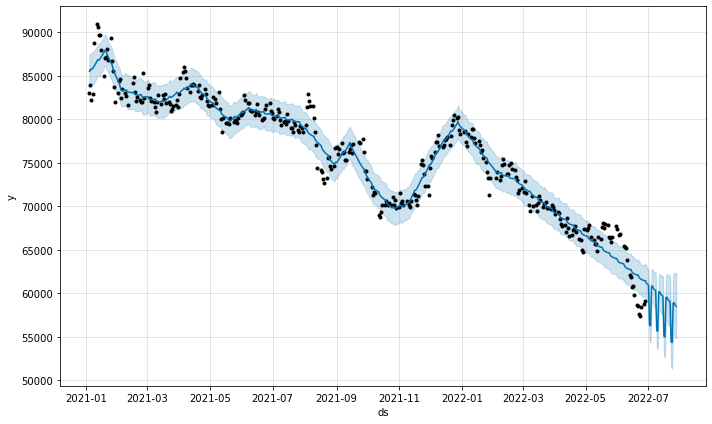

In [18]:
p = Prophet(changepoint_prior_scale=0.8)
forecast = p.fit(stock).predict(future)
fig = p.plot(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


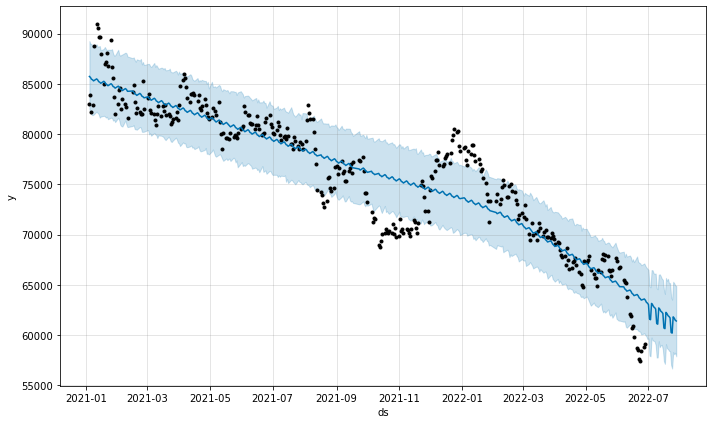

In [19]:
p = Prophet(changepoint_prior_scale=0.01)
forecast = p.fit(stock).predict(future)
fig = p.plot(forecast)

### LSTM

In [28]:
import pandas_datareader as pdr
import datetime
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import argparse
from copy import deepcopy
from sklearn.metrics import mean_absolute_error
import time

#### pandas data reader

In [21]:
start = (2000, 12, 1)
start = datetime.datetime(*start)
end = datetime.date.today()

google = pdr.DataReader('028050.KS', 'yahoo', start, end)

<AxesSubplot:xlabel='Date'>

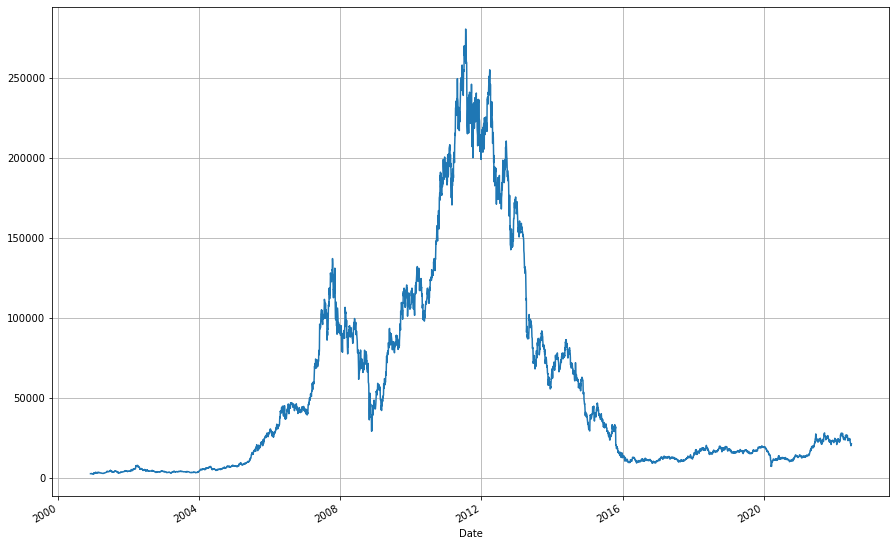

In [22]:
plt.figure(figsize=(15, 10))
google.Close.plot(grid=True)

#### Data Preparation

In [64]:
class StockDataset(Dataset):
    
    def __init__(self, symbol, x_frames, y_frames, start, end):
        
        self.symbol = symbol
        self.x_frames = x_frames
        self.y_frames = y_frames
        
        self.start = datetime.datetime(*start)
        self.end = datetime.datetime(*end)

        self.data = pdr.DataReader(self.symbol, 'yahoo', self.start, self.end)
        print(self.data.isna().sum())
        
    def __len__(self):
        return len(self.data) - (self.x_frames + self.y_frames) + 1
    
    def __getitem__(self, idx):
        idx += self.x_frames
        data = self.data.iloc[idx-self.x_frames:idx+self.y_frames]
        data = data[['High', 'Low', 'Open', 'Close', 'Adj Close', 'Volume']]
        data = data.apply(lambda x: np.log(x+1) - np.log(x[self.x_frames-1]+1))
        data = data.values
        X = data[:self.x_frames]
        y = data[self.x_frames:]
        
        return X, y

In [65]:
dummy_data = StockDataset('028050.KS', 0, 0, (2002, 1, 1), (2020, 1, 1))
len(dummy_data.data)

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64


4503

#### Model(LSTM) Define

In [66]:
class LSTM(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, batch_size, dropout, use_bn):
        super(LSTM, self).__init__()
        self.input_dim = input_dim 
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.num_layers = num_layers

        self.batch_size = batch_size
        self.dropout = dropout
        self.use_bn = use_bn 
        
        self.lstm = nn.LSTM(self.input_dim, self.hidden_dim, self.num_layers)
        self.hidden = self.init_hidden()
        self.regressor = self.make_regressor()
        
    def init_hidden(self):
        return (torch.zeros(self.num_layers, self.batch_size, self.hidden_dim),
                torch.zeros(self.num_layers, self.batch_size, self.hidden_dim))
    
    def make_regressor(self):
        layers = []
        if self.use_bn:
            layers.append(nn.BatchNorm1d(self.hidden_dim))
        layers.append(nn.Dropout(self.dropout))
        
        layers.append(nn.Linear(self.hidden_dim, self.hidden_dim // 2))
        layers.append(nn.ReLU())
        layers.append(nn.Linear(self.hidden_dim // 2, self.output_dim))
        regressor = nn.Sequential(*layers)
        return regressor
    
    def forward(self, x):
        lstm_out, self.hidden = self.lstm(x, self.hidden)
        y_pred = self.regressor(lstm_out[-1].view(self.batch_size, -1))
        return y_pred

In [67]:
def metric(y_pred, y_true):
    perc_y_pred = np.exp(y_pred.cpu().detach().numpy())
    perc_y_true = np.exp(y_true.cpu().detach().numpy())
    mae = mean_absolute_error(perc_y_true, perc_y_pred, multioutput='raw_values')
    return mae*100

#### Train, Validation, Test

In [68]:
def train(model, partition, optimizer, loss_fn, args):
    trainloader = DataLoader(partition['train'], 
                             batch_size=args.batch_size, 
                             shuffle=True, drop_last=True)
    model.train()
    model.zero_grad()
    optimizer.zero_grad()

    train_acc = 0.0
    train_loss = 0.0
    for i, (X, y) in enumerate(trainloader):

        X = X.transpose(0, 1).float().to(args.device)
        y_true = y[:, :, 3].float().to(args.device)
        #print(torch.max(X[:, :, 3]), torch.max(y_true))

        model.zero_grad()
        optimizer.zero_grad()
        model.hidden = [hidden.to(args.device) for hidden in model.init_hidden()]

        y_pred = model(X)
        loss = loss_fn(y_pred.view(-1), y_true.view(-1))
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_acc += metric(y_pred, y_true)[0]

    train_loss = train_loss / len(trainloader)
    train_acc = train_acc / len(trainloader)
    return model, train_loss, train_acc

In [69]:
def validate(model, partition, loss_fn, args):
    valloader = DataLoader(partition['val'], 
                           batch_size=args.batch_size, 
                           shuffle=False, drop_last=True)
    model.eval()

    val_acc = 0.0
    val_loss = 0.0
    with torch.no_grad():
        for i, (X, y) in enumerate(valloader):

            X = X.transpose(0, 1).float().to(args.device)
            y_true = y[:, :, 3].float().to(args.device)
            model.hidden = [hidden.to(args.device) for hidden in model.init_hidden()]

            y_pred = model(X)
            loss = loss_fn(y_pred.view(-1), y_true.view(-1))

            val_loss += loss.item()
            val_acc += metric(y_pred, y_true)[0]

    val_loss = val_loss / len(valloader)
    val_acc = val_acc / len(valloader)
    return val_loss, val_acc

In [70]:
def test(model, partition, args):
    testloader = DataLoader(partition['test'], 
                           batch_size=args.batch_size, 
                           shuffle=False, drop_last=True)
    model.eval()

    test_acc = 0.0
    with torch.no_grad():
        for i, (X, y) in enumerate(testloader):

            X = X.transpose(0, 1).float().to(args.device)
            y_true = y[:, :, 3].float().to(args.device)
            model.hidden = [hidden.to(args.device) for hidden in model.init_hidden()]

            y_pred = model(X)
            test_acc += metric(y_pred, y_true)[0]

    test_acc = test_acc / len(testloader)
    return test_acc

In [71]:
def experiment(partition, args):
    
    model = LSTM(args.input_dim, args.hid_dim, args.y_frames, args.n_layers, args.batch_size, args.dropout, args.use_bn)
    model.to(args.device)
    loss_fn = torch.nn.MSELoss()

    loss_fn = nn.MSELoss()
    if args.optim == 'SGD':
        optimizer = optim.RMSprop(model.parameters(), lr=args.lr, weight_decay=args.l2)
    elif args.optim == 'RMSprop':
        optimizer = optim.RMSprop(model.parameters(), lr=args.lr, weight_decay=args.l2)
    elif args.optim == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=args.lr, weight_decay=args.l2)
    else:
        raise ValueError('In-valid optimizer choice')
    
    # ===== List for epoch-wise data ====== #
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []
    # ===================================== #
        
    for epoch in range(args.epoch):  # loop over the dataset multiple times
        ts = time.time()
        model, train_loss, train_acc = train(model, partition, optimizer, loss_fn, args)
        val_loss, val_acc = validate(model, partition, loss_fn, args)
        te = time.time()
        
        # ====== Add Epoch Data ====== #
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)
        # ============================ #
        
        print('Epoch {}, Acc(train/val): {:2.2f}/{:2.2f}, Loss(train/val) {:2.5f}/{:2.5f}. Took {:2.2f} sec'.format(epoch, train_acc, val_acc, train_loss, val_loss, te-ts))
        
    test_acc = test(model, partition, args)    
    
    # ======= Add Result to Dictionary ======= #
    result = {}
    result['train_losses'] = train_losses
    result['val_losses'] = val_losses
    result['train_accs'] = train_accs
    result['val_accs'] = val_accs
    result['train_acc'] = train_acc
    result['val_acc'] = val_acc
    result['test_acc'] = test_acc
    
    return vars(args), result

#### Manage Experiment

In [72]:
import hashlib
import json
from os import listdir
from os.path import isfile, join
import pandas as pd

def save_exp_result(setting, result):
    exp_name = setting['exp_name']
    del setting['epoch']

    hash_key = hashlib.sha1(str(setting).encode()).hexdigest()[:6]
    filename = './results/{}-{}.json'.format(exp_name, hash_key)
    result.update(setting)
    with open(filename, 'w') as f:
        json.dump(result, f)

    
def load_exp_result(exp_name):
    dir_path = './results'
    filenames = [f for f in listdir(dir_path) if isfile(join(dir_path, f)) if '.json' in f]
    list_result = []
    for filename in filenames:
        if exp_name in filename:
            with open(join(dir_path, filename), 'r') as infile:
                results = json.load(infile)
                list_result.append(results)
    df = pd.DataFrame(list_result) # .drop(columns=[])
    return df

In [73]:
def plot_acc(var1, var2, df):
    
    fig, ax = plt.subplots(1, 3)
    fig.set_size_inches(15, 6)
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})

    sns.barplot(x=var1, y='train_acc', hue=var2, data=df, ax=ax[0])
    sns.barplot(x=var1, y='val_acc', hue=var2, data=df, ax=ax[1])
    sns.barplot(x=var1, y='test_acc', hue=var2, data=df, ax=ax[2])
    
    ax[0].set_title('Train Accuracy')
    ax[1].set_title('Validation Accuracy')
    ax[2].set_title('Test Accuracy')

    
def plot_loss_variation(var1, var2, df, **kwargs):

    list_v1 = df[var1].unique()
    list_v2 = df[var2].unique()
    list_data = []

    for value1 in list_v1:
        for value2 in list_v2:
            row = df.loc[df[var1]==value1]
            row = row.loc[df[var2]==value2]

            train_losses = list(row.train_losses)[0]
            val_losses = list(row.val_losses)[0]

            for epoch, train_loss in enumerate(train_losses):
                list_data.append({'type':'train', 'loss':train_loss, 'epoch':epoch, var1:value1, var2:value2})
            for epoch, val_loss in enumerate(val_losses):
                list_data.append({'type':'val', 'loss':val_loss, 'epoch':epoch, var1:value1, var2:value2})

    df = pd.DataFrame(list_data)
    g = sns.FacetGrid(df, row=var2, col=var1, hue='type', **kwargs)
    g = g.map(plt.plot, 'epoch', 'loss', marker='.')
    g.add_legend()
    g.fig.suptitle('Train loss vs Val loss')
    plt.subplots_adjust(top=0.89) # 만약 Title이 그래프랑 겹친다면 top 값 조정


def plot_acc_variation(var1, var2, df, **kwargs):
    list_v1 = df[var1].unique()
    list_v2 = df[var2].unique()
    list_data = []

    for value1 in list_v1:
        for value2 in list_v2:
            row = df.loc[df[var1]==value1]
            row = row.loc[df[var2]==value2]

            train_accs = list(row.train_accs)[0]
            val_accs = list(row.val_accs)[0]
            test_acc = list(row.test_acc)[0]

            for epoch, train_acc in enumerate(train_accs):
                list_data.append({'type':'train', 'Acc':train_acc, 'test_acc':test_acc, 'epoch':epoch, var1:value1, var2:value2})
            for epoch, val_acc in enumerate(val_accs):
                list_data.append({'type':'val', 'Acc':val_acc, 'test_acc':test_acc, 'epoch':epoch, var1:value1, var2:value2})

    df = pd.DataFrame(list_data)
    g = sns.FacetGrid(df, row=var2, col=var1, hue='type', **kwargs)
    g = g.map(plt.plot, 'epoch', 'Acc', marker='.')

    def show_acc(x, y, metric, **kwargs):
        plt.scatter(x, y, alpha=0.3, s=1)
        metric = "Test Acc: {:1.3f}".format(list(metric.values)[0])
        plt.text(0.05, 0.95, metric,  horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes, bbox=dict(facecolor='yellow', alpha=0.5, boxstyle="round,pad=0.1"))
    g = g.map(show_acc, 'epoch', 'Acc', 'test_acc')

    g.add_legend()
    g.fig.suptitle('Train Accuracy vs Val Accuracy')
    plt.subplots_adjust(top=0.89)

In [74]:
trainset = StockDataset(args.symbol, args.x_frames, args.y_frames, (2000,1,1), (2012,1,1))
valset = StockDataset(args.symbol, args.x_frames, args.y_frames, (2012,1,1), (2016,1,1))
testset = StockDataset(args.symbol, args.x_frames, args.y_frames, (2016,1,1), (2019,2,1))
partition = {'train': trainset, 'val':valset, 'test':testset}

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64


In [77]:
# ====== Random Seed Initialization ====== #
seed = 666
np.random.seed(seed)
torch.manual_seed(seed)

parser = argparse.ArgumentParser()
args = parser.parse_args("")
args.exp_name = "exp1_lr"
args.device = 'cuda' if torch.cuda.is_available() else 'cpu'

# ====== Data Loading ====== #
args.symbol = '028050.KS'
args.batch_size = 128
args.x_frames = 5
args.y_frames = 5

# ====== Model Capacity ===== #
args.input_dim = 6
args.hid_dim = 50
args.n_layers = 2

# ====== Regularization ======= #
args.l2 = 0.00001
args.dropout = 0.0
args.use_bn = True

# ====== Optimizer & Training ====== #
args.optim = 'RMSprop' #'RMSprop' #SGD, RMSprop, ADAM...
args.lr = 0.0001
args.epoch = 2


# ====== Experiment Variable ====== #
name_var1 = 'lr'
name_var2 = 'n_layers'
list_var1 = [0.001, 0.0001, 0.00001]
list_var2 = [1,2,3]


for var1 in list_var1:
    for var2 in list_var2:
        setattr(args, name_var1, var1)
        setattr(args, name_var2, var2)
        print(args)
                
        setting, result = experiment(partition, deepcopy(args))
        save_exp_result(setting, result)

Namespace(batch_size=128, device='cpu', dropout=0.0, epoch=2, exp_name='exp1_lr', hid_dim=50, input_dim=6, l2=1e-05, lr=0.001, n_layers=1, optim='RMSprop', symbol='028050.KS', use_bn=True, x_frames=5, y_frames=5)
Epoch 0, Acc(train/val): 4.92/4.34, Loss(train/val) 0.00981/0.00527. Took 11.82 sec
Epoch 1, Acc(train/val): 2.71/3.14, Loss(train/val) 0.00347/0.00392. Took 11.96 sec
Namespace(batch_size=128, device='cpu', dropout=0.0, epoch=2, exp_name='exp1_lr', hid_dim=50, input_dim=6, l2=1e-05, lr=0.001, n_layers=2, optim='RMSprop', symbol='028050.KS', use_bn=True, x_frames=5, y_frames=5)
Epoch 0, Acc(train/val): 4.97/5.71, Loss(train/val) 0.01460/0.00452. Took 12.18 sec
Epoch 1, Acc(train/val): 3.02/4.60, Loss(train/val) 0.00374/0.00368. Took 11.66 sec
Namespace(batch_size=128, device='cpu', dropout=0.0, epoch=2, exp_name='exp1_lr', hid_dim=50, input_dim=6, l2=1e-05, lr=0.001, n_layers=3, optim='RMSprop', symbol='028050.KS', use_bn=True, x_frames=5, y_frames=5)
Epoch 0, Acc(train/val): 

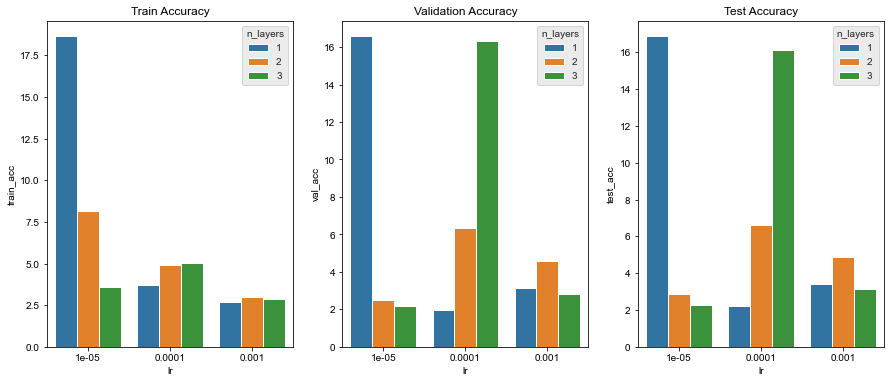

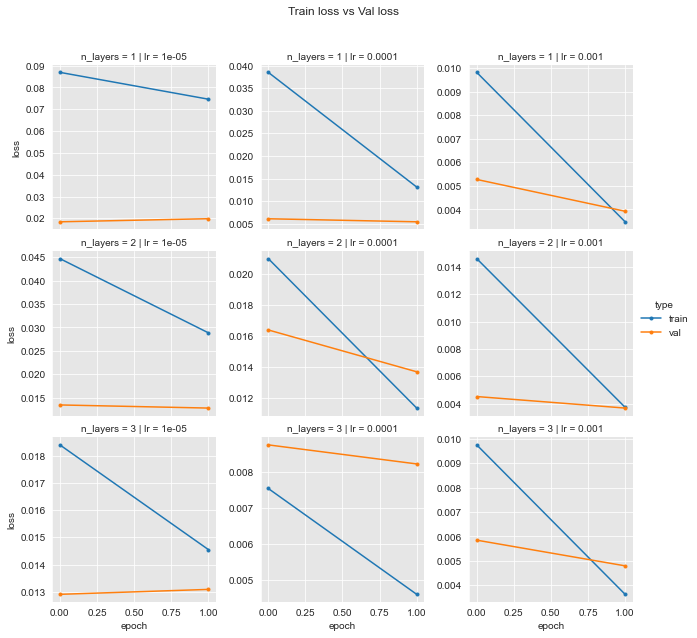

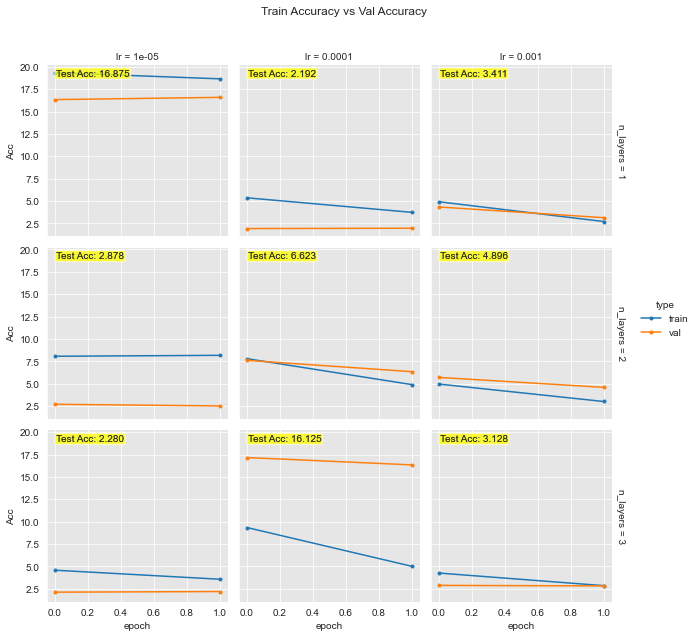

In [78]:
var1 = 'lr'
var2 = 'n_layers'
df = load_exp_result('exp1')

plot_acc(var1, var2, df)
plot_loss_variation(var1, var2, df, sharey=False) #sharey를 True로 하면 모둔 subplot의 y축의 스케일이 같아집니다.
plot_acc_variation(var1, var2, df, margin_titles=True, sharey=True)

### RNN

In [32]:
# import modules

import pandas as pd
import pandas_datareader as pdr
import talib # 주가 계산 처리 라이브러리
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
from sklearn.preprocessing import MinMaxScaler

In [33]:
intc_df = pdr.get_data_yahoo('INTC', start='2000-01-01') # Intel
sox_df = pdr.get_data_yahoo('^SOX', start='2000-01-01') # PHLX semiconductor
vix_df = pdr.get_data_yahoo('^VIX', start='2000-01-01') # CBOE volatility - 시장의 공포심리를 알려주는 지수
snp500_df = pdr.get_data_yahoo('^GSPC', start='2000-01-01') # s&p 500

data_dir = 'data/'
intc_df.to_csv('data/intc.csv')
sox_df.to_csv(f'{data_dir}/sox.csv')
vix_df.to_csv(f'{data_dir}/vix.csv')
snp500_df.to_csv(f'{data_dir}/snp500.csv')

In [34]:
df = pd.read_csv(data_dir+'intc.csv', index_col='Date', parse_dates=True)
sox_df = pd.read_csv(data_dir+'sox.csv', index_col='Date', parse_dates=True)
vix_df = pd.read_csv(data_dir+'vix.csv', index_col='Date', parse_dates=True)
snp500_df = pd.read_csv(data_dir+'snp500.csv', index_col='Date', parse_dates=True)

In [35]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-12-31,41.9375,40.96875,41.906250,41.15625,11572000.0,24.820889
2000-01-03,43.6875,41.62500,41.632812,43.50000,57710200.0,26.234379
2000-01-04,43.9375,41.12500,42.718750,41.46875,51019600.0,25.009367
2000-01-05,42.9375,40.25000,41.500000,41.81250,52389000.0,25.216665
2000-01-06,41.6875,39.09375,40.875000,39.37500,55171200.0,23.746643


In [36]:
# 다음날 수익률을 예측하도록 정의
df['next_rtn'] = df['Close'] / df['Open'] - 1
df['log_rtn'] = np.log(1 + df['Adj Close'].pct_change())

# 이동평균
df['MA5'] = talib.SMA(df['Close'], timeperiod=5)
df['MA10'] = talib.SMA(df['Close'], timeperiod=10)
df['RASD5'] = talib.SMA(talib.STDDEV(df['Close'], timeperiod=5, nbdev=1), timeperiod=5)
df['RASD10'] = talib.SMA(talib.STDDEV(df['Close'], timeperiod=10, nbdev=1), timeperiod=10)

# MACD(Moving Average Convergence & Divergence)
macd, macd_signal, macd_hist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd

# 모멘텀
# CCI(Commodity Channel Index)
df['CCI'] = talib.CCI(df['High'], df['Low'], df['Close'], timeperiod=14)

# 변동성
# ATR(Average True Range)
df['ATR'] = talib.ATR(df['High'], df['Low'], df['Close'], timeperiod=14)

# 볼린저 밴드
upper, middle, lower = talib.BBANDS(df['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
df['upper_band'] = upper
df['middle'] = middle
df['lower_band'] = lower

# MTM1, MTM3
df['MTM1'] = talib.MOM(df['Close'], timeperiod=1)
df['MTM3'] = talib.MOM(df['Close'], timeperiod=3)

# ROC(Rate of Change)
df['ROC'] = talib.ROC(df['Close'], timeperiod=60)

# Williams' percentage return
df['WPR'] = talib.WILLR(df['High'], df['Low'], df['Close'], timeperiod=14)

In [37]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,next_rtn,log_rtn,MA5,MA10,...,MACD,CCI,ATR,upper_band,middle,lower_band,MTM1,MTM3,ROC,WPR
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,41.9375,40.96875,41.906250,41.15625,11572000.0,24.820889,-0.017897,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,43.6875,41.62500,41.632812,43.50000,57710200.0,26.234379,0.044849,0.055385,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.34375,NaN,NaN,NaN
2000-01-04,43.9375,41.12500,42.718750,41.46875,51019600.0,25.009367,-0.029261,-0.047820,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-2.03125,NaN,NaN,NaN
2000-01-05,42.9375,40.25000,41.500000,41.81250,52389000.0,25.216665,0.007530,0.008255,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.34375,0.65625,NaN,NaN
2000-01-06,41.6875,39.09375,40.875000,39.37500,55171200.0,23.746643,-0.036697,-0.060064,41.4625,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-2.43750,-4.12500,NaN,NaN


In [38]:
# df를 제외한 나머지 데이터프레임은 Close column을 각 종목명으로 변경
# (중복 칼럼 구분을 위해)
snp500_df = snp500_df.loc[:, ['Close']].copy()
snp500_df.rename(columns={'Close':'S&P500'}, inplace=True)

sox_df = sox_df.loc[:, ['Close']].copy()
sox_df.rename(columns={'Close':'SOX'}, inplace=True)

vix_df = vix_df.loc[:, ['Close']].copy()
vix_df.rename(columns={'Close':'VIX'}, inplace=True)

# 데이터 조인
df = df.join(snp500_df, how='left')
df = df.join(sox_df, how='left')
df = df.join(vix_df, how='left')

df.head()

,High,Low,Open,Close,Volume,Adj Close,next_rtn,log_rtn,MA5,MA10,...,upper_band,middle,lower_band,MTM1,MTM3,ROC,WPR,S&P500,SOX,VIX
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,41.9375,40.96875,41.906250,41.15625,11572000.0,24.820889,-0.017897,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1469.250000,704.559998,24.639999
2000-01-03,43.6875,41.62500,41.632812,43.50000,57710200.0,26.234379,0.044849,0.055385,NaN,NaN,...,NaN,NaN,NaN,2.34375,NaN,NaN,NaN,1455.219971,713.200012,24.209999
2000-01-04,43.9375,41.12500,42.718750,41.46875,51019600.0,25.009367,-0.029261,-0.047820,NaN,NaN,...,NaN,NaN,NaN,-2.03125,NaN,NaN,NaN,1399.420044,687.320007,27.010000
2000-01-05,42.9375,40.25000,41.500000,41.81250,52389000.0,25.216665,0.007530,0.008255,NaN,NaN,...,NaN,NaN,NaN,0.34375,0.65625,NaN,NaN,1402.109985,678.539978,26.410000
2000-01-06,41.6875,39.09375,40.875000,39.37500,55171200.0,23.746643,-0.036697,-0.060064,41.4625,NaN,...,NaN,NaN,NaN,-2.43750,-4.12500,NaN,NaN,1403.449951,669.330017,25.730000


In [39]:
# split features
feature1_list = ['Open', 'High', 'Low', 'Adj Close', 'Volume', 'log_rtn']
feature2_list = ['RASD5', 'RASD10', 'upper_band', 'lower_band', 'CCI', 'ATR', 'MACD', 'MA5', 'MA10', 'MTM1', 'MTM3', 'ROC', 'WPR']
feature3_list = ['S&P500', 'SOX', 'VIX']
feature4_list = ['next_rtn']
all_features = feature1_list + feature2_list + feature3_list + feature4_list

phase_flag = '3'

if phase_flag == '1':
    train_from = '2010-01-04'
    train_to = '2012-01-01'
    val_from = '2012-01-04'
    val_to = '2012-04-01'
    test_from = '2012-04-01'
    test_to = '2012-07-01'

elif phase_flag == '2':
    train_from = '2010-07-01'
    train_to = '2014-07-01'
    val_from = '2014-07-01'
    val_to = '2014-10-01'
    test_from = '2014-10-01'
    test_to = '2015-01-01'

else:
    train_from = '2015-01-01'
    train_to = '2017-01-01'
    val_from = '2017-01-01'
    val_to = '2017-04-01'
    test_from = '2017-04-01'
    test_to = '2017-07-01'

train_df = df.loc[train_from:train_to, all_features].copy()
val_df = df.loc[val_from:val_to, all_features].copy()
test_df = df.loc[test_from:test_to, all_features].copy()

In [40]:
train_df

,Open,High,Low,Adj Close,Volume,log_rtn,RASD5,RASD10,upper_band,lower_band,...,MA5,MA10,MTM1,MTM3,ROC,WPR,S&P500,SOX,VIX,next_rtn
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,36.669998,37.160000,36.110001,29.616634,23605600.0,0.001927,0.360369,0.563430,37.964195,35.625804,...,36.828,36.961,0.070000,-0.820000,8.634596,-57.261459,2058.199951,686.729980,17.790001,-0.008454
2015-01-05,36.200001,36.450001,35.939999,29.282665,32785000.0,-0.011340,0.359143,0.558205,37.902114,35.536885,...,36.508,36.854,-0.410000,-0.809998,4.902248,-74.273902,2020.579956,673.590027,19.920000,-0.006906
2015-01-06,36.080002,36.230000,35.259998,28.736921,30847600.0,-0.018813,0.429746,0.581770,37.855069,35.344930,...,36.128,36.745,-0.670002,-1.010002,4.937537,-99.193531,2002.609985,658.830017,21.120001,-0.022173
2015-01-07,35.639999,36.070000,35.270000,29.339685,27725200.0,0.020758,0.449678,0.606340,37.788620,35.293380,...,35.980,36.626,0.740002,-0.340000,12.879977,-69.354794,2025.900024,665.270020,19.309999,0.010662
2015-01-08,36.369999,37.000000,36.259998,29.885431,31765400.0,0.018430,0.450896,0.618901,37.770449,35.291550,...,36.060,36.552,0.669998,0.739998,16.587224,-42.338775,2062.139893,684.650024,17.010000,0.008798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,36.930000,36.980000,36.770000,32.042938,6287300.0,0.001083,0.244873,0.679499,37.926178,33.764822,...,36.996,36.740,0.040001,-0.239998,-0.937831,-12.458929,2263.790039,927.919983,11.440000,0.001083
2016-12-27,36.910000,37.330002,36.910000,32.129612,9033700.0,0.002701,0.222587,0.632414,38.064119,33.782881,...,37.032,36.850,0.099998,0.090000,-1.801325,-9.655138,2268.879883,939.210022,11.990000,0.004335
2016-12-28,37.099998,37.200001,36.580002,31.748243,12868600.0,-0.011941,0.191533,0.568043,38.131784,33.847216,...,36.916,36.833,-0.439999,-0.299999,-2.734994,-33.802739,2249.919922,921.090027,12.950000,-0.012668


In [48]:
print(df.columns)
print(train_df.columns)
len(all_features)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'next_rtn',
       'log_rtn', 'MA5', 'MA10', 'RASD5', 'RASD10', 'MACD', 'CCI', 'ATR',
       'upper_band', 'middle', 'lower_band', 'MTM1', 'MTM3', 'ROC', 'WPR',
       'S&P500', 'SOX', 'VIX'],
      dtype='object')
Index(['Open', 'High', 'Low', 'Adj Close', 'Volume', 'log_rtn', 'RASD5',
       'RASD10', 'upper_band', 'lower_band', 'CCI', 'ATR', 'MACD', 'MA5',
       'MA10', 'MTM1', 'MTM3', 'ROC', 'WPR', 'S&P500', 'SOX', 'VIX',
       'next_rtn'],
      dtype='object')


23

In [42]:
def min_max_normal(tmp_df):
    eng_list = []
    sample_df = tmp_df.copy()

    for x in all_features:
        if x in feature4_list:
            continue

        series = sample_df[x].copy()
        values = series.values
        values = values.reshape((len(values), 1))

        # 스케일러 생성
        scaler = MinMaxScaler(feature_range=(0,1))
        scaler = scaler.fit(values)

        # 데이터 정규화
        normalized = scaler.transform(values)
        new_feature = f'{x}_normalized'
        eng_list.append(new_feature)
        sample_df[new_feature] = normalized

    return sample_df, eng_list

In [43]:
train_sample_df, eng_list = min_max_normal(train_df)
val_sample_df, eng_list = min_max_normal(val_df)
test_sample_df, eng_list = min_max_normal(test_df)

In [44]:
def create_dataset_binary(data, feature_list, step, n):
    train_x = np.array(data[feature_list[0:n]])
    m = np.arange(len(train_x) - step)
    x, y = [], []

    for i in m:
        a = train_x[i: (i+step)]
        x.append(a)

    x_batch = np.reshape(np.array(x), (len(m), step, n)) # np.reshape(array like, new shape)

    train_y = np.array(data[[feature_list[n]]])

    for i in m+step:
        start_price = train_y[i-1][0]
        end_price = train_y[i][0]

        if end_price > start_price:
            label = 1
        else:
            label = 0

        y.append(label)

    y_batch = np.reshape(np.array(y), (-1, 1))

    return x_batch, y_batch

In [45]:
num_step = 5
num_unit = 200
n_feature = len(eng_list) - 1

x_train, y_train = create_dataset_binary(train_sample_df[eng_list], eng_list, num_step, n_feature)
x_val, y_val = create_dataset_binary(val_sample_df[eng_list], eng_list, num_step, n_feature)
x_test, y_test = create_dataset_binary(test_sample_df[eng_list], eng_list, num_step, n_feature)

In [46]:
x_train.shape

(499, 5, 21)

#### LSTM model build-up

In [26]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, LSTM, Activation, BatchNormalization, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers

In [49]:
K.clear_session()

input_layer = Input(batch_shape=(None, x_train.shape[1], x_train.shape[2]))

layer_lstm1 = LSTM(num_unit, return_sequences=True, recurrent_regularizer=regularizers.l2(0.01))(input_layer)
layer_lstm1 = BatchNormalization()(layer_lstm1)

layer_lstm2 = LSTM(num_unit, return_sequences=True, recurrent_regularizer=regularizers.l2(0.01))(layer_lstm1)
layer_lstm2 = Dropout(0.25)(layer_lstm2)

layer_lstm3 = LSTM(num_unit, return_sequences=True, recurrent_regularizer=regularizers.l2(0.01))(layer_lstm2)
layer_lstm3 = BatchNormalization()(layer_lstm3)

layer_lstm4 = LSTM(num_unit, return_sequences=True, recurrent_regularizer=regularizers.l2(0.01))(layer_lstm3)
layer_lstm4 = Dropout(0.25)(layer_lstm4)

layer_lstm5 = LSTM(num_unit, recurrent_regularizer=regularizers.l2(0.01))(layer_lstm4)
layer_lstm5 = BatchNormalization()(layer_lstm5)

output_layer = Dense(2, activation='sigmoid')(layer_lstm5)

model = Model(input_layer, output_layer)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5, 21)]           0         
                                                                 
 lstm (LSTM)                 (None, 5, 200)            177600    
                                                                 
 batch_normalization (BatchN  (None, 5, 200)           800       
 ormalization)                                                   
                                                                 
 lstm_1 (LSTM)               (None, 5, 200)            320800    
                                                                 
 dropout (Dropout)           (None, 5, 200)            0         
                                                                 
 lstm_2 (LSTM)               (None, 5, 200)            320800    
                                                             

In [79]:
history = model.fit(x_train, y_train, epochs=20, batch_size=10, verbose=1, validation_data=(x_val, y_val))

Epoch 1/20
50/50 [==============================] - 1s 30ms/step - loss: 0.7198 - accuracy: 0.5371 - val_loss: 0.7470 - val_accuracy: 0.4561
Epoch 2/20
50/50 [==============================] - 1s 24ms/step - loss: 0.7147 - accuracy: 0.5371 - val_loss: 0.7290 - val_accuracy: 0.4561
Epoch 3/20
50/50 [==============================] - 1s 26ms/step - loss: 0.7139 - accuracy: 0.5691 - val_loss: 0.7335 - val_accuracy: 0.5263
Epoch 4/20
50/50 [==============================] - 1s 26ms/step - loss: 0.7272 - accuracy: 0.5391 - val_loss: 0.8530 - val_accuracy: 0.4912
Epoch 5/20
50/50 [==============================] - 1s 24ms/step - loss: 0.7287 - accuracy: 0.5291 - val_loss: 0.7582 - val_accuracy: 0.4912
Epoch 6/20
50/50 [==============================] - 1s 28ms/step - loss: 0.7071 - accuracy: 0.5651 - val_loss: 0.7514 - val_accuracy: 0.4912
Epoch 7/20
50/50 [==============================] - 1s 26ms/step - loss: 0.7125 - accuracy: 0.5351 - val_loss: 0.7219 - val_accuracy: 0.5439
Epoch 8/20
50

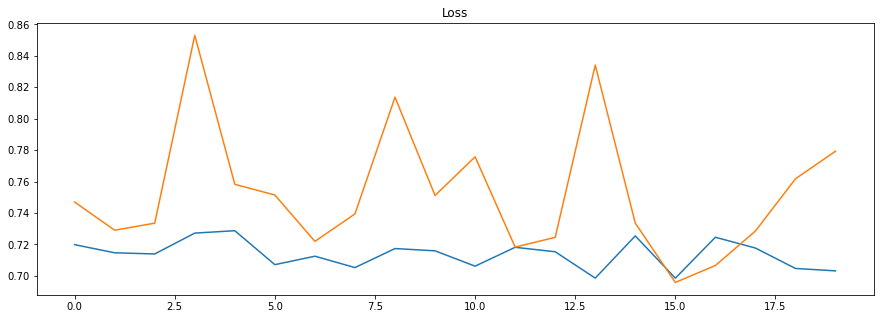

In [80]:
def plot_hist(history):
    plt.figure(figsize=(15,5))
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Loss')

plot_hist(history)

In [55]:
history.history['loss']

[6.2788777351379395,
 2.131528615951538,
 1.2568390369415283,
 0.9805254936218262,
 0.8375633955001831,
 0.7877011299133301,
 0.7553215026855469,
 0.769280195236206,
 0.7334805727005005,
 0.7388104796409607,
 0.7397052049636841,
 0.7354211211204529,
 0.7279480695724487,
 0.7227223515510559,
 0.7517446279525757,
 0.7420600056648254,
 0.7027339935302734,
 0.725422203540802,
 0.7451358437538147,
 0.7359743714332581]

### CNN

In [71]:
import matplotlib.dates as mdates

def create_label(fname, seq_len):
    print('Creating label...')

    fname = fname.split('/')
    remove_output(f"{fname[1][:-4]}_label_{seq_len}.txt")

    df = pd.read_csv(fname, parse_dates=True, index_col=0)
    df.fillna(0)

    df.reset_index(inplace=True)
    df['Date'] = df['Date'].map(mdates.date2num)
    for i in range(0, len(seq_len)):
        c = df.ix[i: i+int(seq_len), :]
        starting = 0
        endvalue = 0
        label = ""

        if len(c) == int(seq_len)+1:
            label = 1
        else:
            label = 0

        with open("{}_label_{}.txt".format(fname[1][:-4], seq_len), 'a') as the_file:
            the_file.write("{}-{},{}".format(fname[1][:-4], i, label))
            the_file.write('\n')

    print('Create label finished')

In [69]:
# 캔들차트 그리기
import os
pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

def ohlc2cs(fname, seq_len, dataset_type, dimension, use_volume):
    print('Converting ohlc to candlestick')

    symbol = fname.split('_')[0]
    symbol = symbol.split('/')[1]
    print(symbol)
    path = "{}".format(os.getcwd())
    if not os.path.exists("{}/dataset/{}_{}/{}/{}".format(path, seq_len, dimension, symbol, dataset_type)):
        os.makedirs("{}/dataset/{}_{}/{}/{}".format(path, seq_len, dimension, symbol, dataset_type))

    df = pd.read_csv(fname, parse_dates=True, index_col=0)
    df.fillna(0)

    plt.style.use('dark_backgroud')
    df.reset_index(inplace=True)
    df['Date'] = df['Date'].map(mdates.date2num)

    for i in range(0, len(df)-int(seq_len)):
        # ohlc + volume
        c = df.ix[i: i+int(seq_len)-1, :]
        if len(c) == int(seq_len):
            my_dpi = 96
            fig = plt.figure(figsize=(dimension/my_dpi, dimension/my_dpi), dpi=my_dpi)
            ax1 = fig.add_subplot(1, 1, 1)
            candlestick2_ochl(ax1, c['Open'], c['Close'], c['High'], c['Low'], width=1, colorup='#77d879', colordown='#db3f3f')
            ax1.grid(False)
            ax1.set_xticklabels([])
            ax1.set_yticklabels([])
            ax1.xaxis.set_visible(False)
            ax1.yaxis.set_visible(False)
            ax1.axis('off')

            # 두 번쨰 축 생성
            if use_volume:
                ax2 = ax1.twinx()
                bc = volume_overlay(ax2, c['Open'], c['Close'], c['Volume'], colorup='#77d879', colordown='#db3f3f', alpha=0.5, width=1)
                ax2.add_collection(bc)
                ax.grid(False)
                ax.set_xticklabels([])
                ax.set_yticklabels([])
                ax2.xaxis.set_visible(False)
                ax2.yaxis.set_visible(False)
                ax2.axis('off')
            
            png_file = 'dataset/{}_{}/{}/{}/{}-{}.png'.format(seq_len, dimension, symbol, dataset_type, fname[11:-4], i)
            fig.savefig(png_file, pad_inches=0, transparent=False)

    print('Converting olhc to candlestick finished')

In [70]:
def image2dataset(input, label_file):
    label_dict = {}
    with open(label_file) as f:
        for line in f:
            (key, val) = line.split(',')
            label_dict[key] = val.rstrip()

    path = "{}/{}".format(os.getcwd(), input)
    for filename in os.listdir(path):
        if filename is not '':
            for k, v in label_dict.items():
                splitname = filename.split('_')
                f, e = os.path.splitext(filename)
                newname = "{}_{}".format(splitname[0], splitname[1])
                if newname == k:
                    new_name = "{}{}.png".format(v, f)
                    os.rename("{}/{}".format(path, filename), "{}/{}".format(path, new_name))
                    break

    folders = ['1', '0']
    for folder in folders:
        if not os.path.exists("{}/classes/{}".format(path, folder)):
            os.makedirs("{}/classes/{}".format(path, folder))

    for filename in os.listdir(path):
        if (filename is not '') and (filename is not 'classes'):
            f, e = os.path.splitext(filename)
            if label_dict[f] == '1':
                move("{}/{}".format(path, filename), "{}/classes/1/{}".format(path, filename))
            elif label_dict[f] == 0:
                move("{}/{}".format(path, filename), "{}/classes/0/{}".format(path, filename))
    
    print('Done')

In [66]:
cnt_test = 0
cnt_train = 0
for root, dirs, files in os.walk("{}/{}".format(pathdir, origin))

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement mdates (from versions: none)
ERROR: No matching distribution found for mdates
You should consider upgrading via the 'c:\Users\bigcare\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.
